In [1]:
from fastai.collab import *
from fastai.tabular.all import *
from time import *

In [2]:
path = Path('.')
df = pd.read_csv(path/'training_data_v3.csv', delimiter=',', engine='python', header=0)

In [3]:
df.head()

,date,mor_temp,mor_humid,mor_wspd,mor_wdeg,mor_cloud,mor_weather_id,noo_temp,noo_humid,noo_wspd,noo_wdeg,noo_cloud,noo_weather_id,aft_temp,aft_humid,aft_wspd,aft_wdeg,aft_cloud,aft_weather_id,daily_power
0,2011-10-10,16.798571,82.285714,7.285714,250.000000,62.142857,803,18.784,69.6,7.60,244.0,32.0,802,16.752857,77.857143,7.000000,250.000000,45.000000,802,6.4
1,2011-10-11,15.838571,81.428571,7.142857,245.714286,62.142857,802,17.404,74.4,6.40,252.0,75.0,803,16.172857,79.000000,6.100000,247.142857,67.142857,803,4.8
2,2011-10-26,10.331429,83.000000,4.857143,194.285714,77.142857,803,13.438,63.4,5.80,186.0,51.0,803,10.824286,74.857143,2.428571,148.571429,9.000000,800,10.1
3,2011-10-27,9.051429,80.285714,3.428571,111.428571,56.571429,803,16.068,58.2,5.60,142.0,75.0,803,12.577143,77.285714,2.142857,131.428571,67.142857,803,10.0
4,2011-10-28,11.831429,84.857143,1.428571,177.142857,49.571429,801,17.372,67.4,1.29,194.6,17.0,801,13.801429,81.714286,1.198571,132.857143,44.285714,802,9.4


The sun rises and sets at different time during year. Therefore time, interm of day and month is also an important factor to predict the solar energy.

In [4]:
day_list = []
month_list = []
for i in range(len(df)):
    day_list.append(int(df.date[i][8:]))
    month_list.append(int(df.date[i][5:7]))
df['day'] = day_list
df['month'] = month_list

In [5]:
df.head()

,date,mor_temp,mor_humid,mor_wspd,mor_wdeg,mor_cloud,mor_weather_id,noo_temp,noo_humid,noo_wspd,...,noo_weather_id,aft_temp,aft_humid,aft_wspd,aft_wdeg,aft_cloud,aft_weather_id,daily_power,day,month
0,2011-10-10,16.798571,82.285714,7.285714,250.000000,62.142857,803,18.784,69.6,7.60,...,802,16.752857,77.857143,7.000000,250.000000,45.000000,802,6.4,10,10
1,2011-10-11,15.838571,81.428571,7.142857,245.714286,62.142857,802,17.404,74.4,6.40,...,803,16.172857,79.000000,6.100000,247.142857,67.142857,803,4.8,11,10
2,2011-10-26,10.331429,83.000000,4.857143,194.285714,77.142857,803,13.438,63.4,5.80,...,803,10.824286,74.857143,2.428571,148.571429,9.000000,800,10.1,26,10
3,2011-10-27,9.051429,80.285714,3.428571,111.428571,56.571429,803,16.068,58.2,5.60,...,803,12.577143,77.285714,2.142857,131.428571,67.142857,803,10.0,27,10
4,2011-10-28,11.831429,84.857143,1.428571,177.142857,49.571429,801,17.372,67.4,1.29,...,801,13.801429,81.714286,1.198571,132.857143,44.285714,802,9.4,28,10


Date is useless now, so it can be dropped out.

In [6]:
df.drop(['date'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mor_temp        3285 non-null   float64
 1   mor_humid       3285 non-null   float64
 2   mor_wspd        3285 non-null   float64
 3   mor_wdeg        3285 non-null   float64
 4   mor_cloud       3285 non-null   float64
 5   mor_weather_id  3285 non-null   int64  
 6   noo_temp        3285 non-null   float64
 7   noo_humid       3285 non-null   float64
 8   noo_wspd        3285 non-null   float64
 9   noo_wdeg        3285 non-null   float64
 10  noo_cloud       3285 non-null   float64
 11  noo_weather_id  3285 non-null   int64  
 12  aft_temp        3285 non-null   float64
 13  aft_humid       3285 non-null   float64
 14  aft_wspd        3285 non-null   float64
 15  aft_wdeg        3285 non-null   float64
 16  aft_cloud       3285 non-null   float64
 17  aft_weather_id  3285 non-null   i

To avoid overfit, 15% of the original dataset will be hiden from the model and be used later as the test set.

In [8]:
train_df = df[:2792]
test_df = df[2792:]

fastai determines which columns should be treated as categorical variables by comparing the number of distinct levels in the variable to the value of the max_card variable:

In [9]:
cont_df,cat_df = cont_cat_split(train_df, max_card = 100, dep_var = 'daily_power')

In [10]:
df[cat_df].nunique()

mor_weather_id    20
noo_weather_id    21
aft_weather_id    21
day               31
month             12
dtype: int64

The data must be normalized before being fed to the neural network:

In [12]:
procs_nn = [Categorify, Normalize]
splits = RandomSplitter(0.3)(range_of(train_df))
to_nn = TabularPandas(train_df, procs_nn, cat_df, cont_df, splits=splits, y_names='daily_power')

In [13]:
dls = to_nn.dataloaders(150)

In [14]:
y = to_nn.train.y
y.min(), y.max()

(0.0, 34.0)

In [15]:
from fastai.tabular.all import*

In [20]:
learn = tabular_learner(dls, layers=[1000,500], y_range=(-0.2, 34.5), n_out=1, loss_func=F.mse_loss)

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.0003311311302240938)

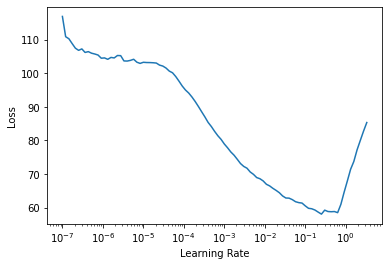

In [21]:
learn.lr_find()

In [22]:
learn.fine_tune(15, 1e-1)

epoch,train_loss,valid_loss,time
0,132.526215,80.799744,00:00


epoch,train_loss,valid_loss,time
0,54.116470,45.391899,00:00
1,45.362877,34.272526,00:00
2,40.052620,39.765831,00:00
3,38.391491,28.642313,00:00
4,37.849846,131.345001,00:00
5,41.838406,56.511154,00:00
6,42.640308,40.768108,00:00
7,40.578781,31.395908,00:00
8,37.311440,30.075502,00:00
9,34.938129,29.486628,00:00


In [23]:
preds,targs = learn.get_preds()

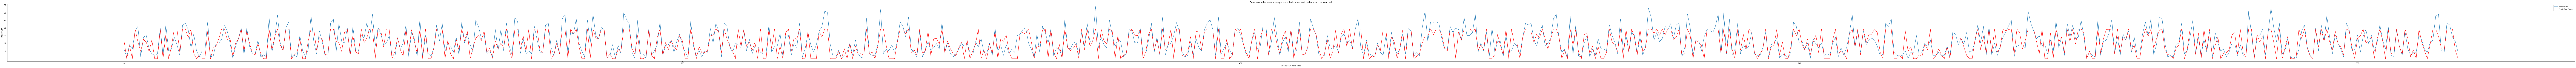

In [24]:
plt.figure(figsize=(260,6))
plt.plot(range(len(targs)), targs)
plt.plot(range(len(preds)), preds, 'r')
plt.title('Comparison between average predicted values and real ones in the valid set')
plt.ylabel('Day Power')
plt.xlabel('Average Of Valid Data')
plt.legend(['Real Power', 'Predicted Power'])
plt.show()

In [25]:
input_df = test_df.drop('daily_power', axis=1)

In [26]:
test_output = []
for i in range(len(input_df)):
    row, clas, probs = learn.predict(input_df.iloc[i])
    test_output.append(clas)

In [27]:
test_output

[tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([17.6977]),
 tensor([-0.2000]),
 tensor([-0.2000]),
 tensor([16.8901]),
 tensor([17.5051]),
 tensor([18.1014]),
 tensor([9.5436]),
 tensor([15.5815]),
 tensor([16.2776]),
 tensor([13.6006]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([8.7199]),
 tensor([6.0242]),
 tensor([19.2962]),
 tensor([-0.2000]),
 tensor([-0.2000]),
 tensor([-0.2000]),
 tensor([-0.2000]),
 tensor([17.7774]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([7.8766]),
 tensor([-0.2000]),
 tensor([-0.2000]),
 tensor([10.6631]),
 tensor([11.9012]),
 tensor([9.9477]),
 tensor([13.9364]),
 tensor([15.3210]),
 tensor([8.5014]),
 tensor([13.9219]),
 tensor([19.2962]),
 tensor([18.8659]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tensor([19.2962]),
 tenso

In [28]:
test_target = []
for i in range(len(test_df)):
    test_target.append(test_df['daily_power'].iloc[i])

/home/nhat/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:171: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/nhat/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


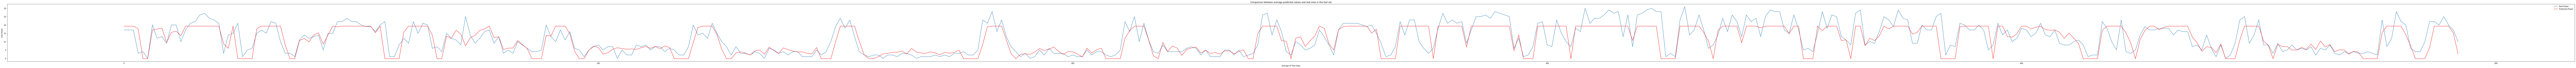

In [29]:
plt.figure(figsize=(260,6))
plt.plot(range(len(test_target)), test_target)
plt.plot(range(len(test_output)), test_output, 'r')
plt.title('Comparison between average predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.xlabel('Average Of Test Data')
plt.legend(['Real Power', 'Predicted Power'])
plt.show()

The graph look good, it seems to be there is no overfit here. A MSRE value can be used for a more accurate description.

In [30]:
Sum_SE = 0
for i in range(len(test_df)):
    Sum_SE += (test_output[i]-test_target[i])**2
MSRE = math.sqrt(Sum_SE/len(test_df))
print(MSRE)

5.336787098930089
